In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1

In [2]:
#1
n = 1000
a = np.random.normal(0, 1, (n, n))
A = a + a.T

In [3]:
w = np.linalg.eigvalsh(A)

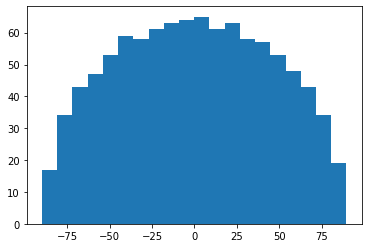

In [4]:
plt.hist(w, bins=20)
plt.show()

# Задание 2

In [5]:
#2 
n = 10
a = np.random.normal(0, 1, (n, n))
A = a @ a.T
w = np.linalg.eigvals(A)
w.shape

(10,)

In [6]:
def is_tr(A:np.ndarray):
    T = A - np.triu(A)
    return (T <= 1e-3).all()

def qr_without_shifts(A):
    A_0 = A.copy()
    while not is_tr(A_0):
        Q_k, R_k = np.linalg.qr(A_0)
        A_0 = R_k @ Q_k
    return A_0.diagonal()

In [7]:
w_qr = qr_without_shifts(A)

In [8]:
print("QR min value: %f" % min(w_qr))
print("Standard function min value: %f" % min(w))

QR min value: 0.104074
Standard function min value: 0.104074


In [9]:
A_0 = A.copy()
i = 1
w_min = min(w)
while abs(w_min - min(A_0.diagonal())) / w_min > 1e-2:
    i += 1
    Q_k, R_k = np.linalg.qr(A_0)
    A_0 = R_k @ Q_k
print("Num of iterations:", i)
print("accuracy:", abs(w_min - min(A_0.diagonal())) / w_min * 100, "%")

Num of iterations: 3
accuracy: 0.06331159667834302 %


# Задание 3

In [10]:
#3
A = np.array([[0, 1], [0, 0]])
s = np.linalg.eigvalsh(A)
print(s)

[0. 0.]


In [11]:
from math import sqrt
f = lambda z: sqrt(2. * abs(z)**2 + sqrt(4.*abs(z)**2 + 1) + 1) / (sqrt(2) * abs(z)**2)

In [12]:
d = np.linspace(-20, 20, 2000)

In [13]:
v = np.random.uniform(-20.0, 20.0, size=2000)
vals = [f(complex(k[0], k[1])) for k in zip(d, v)]

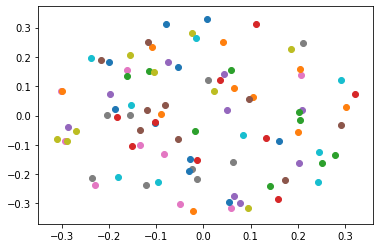

In [14]:
for i in range(10**6):
    r = np.random.uniform(-30., 30.)
    im = np.random.uniform(-30., 30.)
    if abs(f(complex(r, im))) >= 10.:
        plt.scatter(r, im)


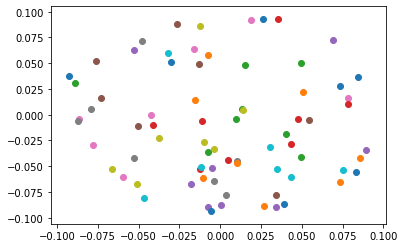

In [15]:
for i in range(10**6):
    r = np.random.uniform(-10., 10.)
    im = np.random.uniform(-10., 10.)
    if abs(f(complex(r, im))) >= 100.:
        plt.scatter(r, im)

In [16]:
x = np.arange(-12., 12., 0.5)
y = np.arange(-12., 12., 0.5)
vals = [f(complex(k[0], k[1])) for k in zip(x, y) if k != (0, 0)]

# Задание 4

In [17]:
def inverse_iter(a, vec, mu, eps=1e-3, maxiter=1000):
    """Реализует алгоритм степенной итерации поиска максимального собственного значения матрицы a 
        с начальным приближением собственного вектора vec и начальным приближением собственного значения mu
    
    Parameters
    ----------
    a : array-like of floats, shape (n, n)
        Введённая матрица
    vec : array-like of floats, shape (n,)
        Введённое начальное приближение собственного вектора
    mu : float
        Введённое начальное приближение собственного значения
    eps : float
        Введённая точность 
    maxiter : integer
        Максимальное количество итераций
    
    Returns
    -------
    lm : float
        Приближение максимального собственного значения
    outvec : array of floats, shape (n,)
        Приближение собственного вектора
    iters : integer
        Количество итераций
    """
    a = np.asarray(a, dtype=float)
    if a.ndim != 2:
        raise ValueError("a.ndim = %s, expected 2" % a.ndim)
    
    vec = np.asarray(vec, dtype=float)
    if vec.ndim != 1:
        raise ValueError("vec.ndim = %s, expected 1" % vec.ndim)
        
    if (a.shape[0] != a.shape[1]):
        raise ValueError("a is not square")
        
    if (a.shape[0] != vec.shape[0]):
        raise ValueError("vec should be of length %s" % a.shape[0])
    
    y = np.zeros(vec.shape)
    x_n = vec.copy()
    l = mu
    n = maxiter
    for i in range(maxiter):
        l_p = l
        l = x_n.T @ (a @ np.reshape(x_n, (-1, 1)))
        if abs(l - l_p) / l_p <= eps:
            n = i
            break
        b = a - l * np.eye(a.shape[0])
        y = np.linalg.solve(b, x_n)
        x_n = y / np.linalg.norm(y)

    return l, x_n, n

In [18]:
n = 100


In [19]:
def get_min_eig(n):
    D = np.diag(np.random.normal(0, 1, n))
    u = np.random.normal(0, 1, n)
    d1 = min(D.diagonal())
#     v1 = np.linalg.solve(D - (d1+0.001) * np.eye(n), np.zeros(n))
    v1 = np.random.normal(0, 1, n)
    l, v, k = inverse_iter(D, v1, d1)
    print(min(np.linalg.eigvals(D + u.T @ u / (u @ u.T))))
    return l, v

In [20]:
get_min_eig(n)

-2.101852010155523


(array([19.43167679]),
 array([-0.92381133,  2.55993563,  0.82115337, -0.03300347,  0.43409528,
        -0.56351467, -0.40748517,  0.56095385, -0.02242   , -0.52525005,
         0.8269162 ,  0.31421935,  0.58353913, -0.55288875,  1.6135061 ,
        -0.31720379, -0.99015331,  1.49827866,  0.50637269, -0.37681467,
        -1.30488519, -0.42615407,  1.37756027, -1.13946807, -0.28471162,
        -0.10574819, -0.69816599,  0.97412516, -0.3046609 , -0.72428238,
         0.72957373, -0.66110658,  0.85009762,  0.56595316,  0.83650833,
        -0.26607387,  0.03003801,  0.31957966,  0.34967922,  2.42724247,
         0.07905602, -0.55952705,  1.23437757,  1.14904126,  0.54071245,
        -0.49484811, -0.24619716, -2.18835498,  2.53716274,  1.03730369,
        -0.3197887 ,  0.11843069,  0.50725327, -1.32897261,  1.21417645,
        -1.54180938, -0.8680766 , -0.07540206, -0.38413441,  1.55412538,
         0.67599481,  1.11034007, -1.44331267, -1.70498579, -0.85948427,
        -2.00280501, -0.1909

In [21]:
get_min_eig(10**5)

MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64